# Классификация. Практика

У вас есть датасет с параметрами мобильных телефонов. Переменная price_range отвечает за то, к какой категории относится телефон: `1` — дорогие, `0` — дешевые.

Ваша задача состоит в том, чтобы наиболее точно научиться классифицировать телефоны по этим двум категориям на основании других параметров.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/train_mobile.csv', sep=';')

Проверим количество пустых значений:

In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Шаг 1
Для начала нам надо отобрать признаки, с помощью которых мы будем предсказывать категорию телефона.

### Отбор признаков:

Выберите пять признаков, у которых наибольшая взаимосвязь с целевой переменной (с помощью корреляции). Отметьте отобранные признаки:

<AxesSubplot:>

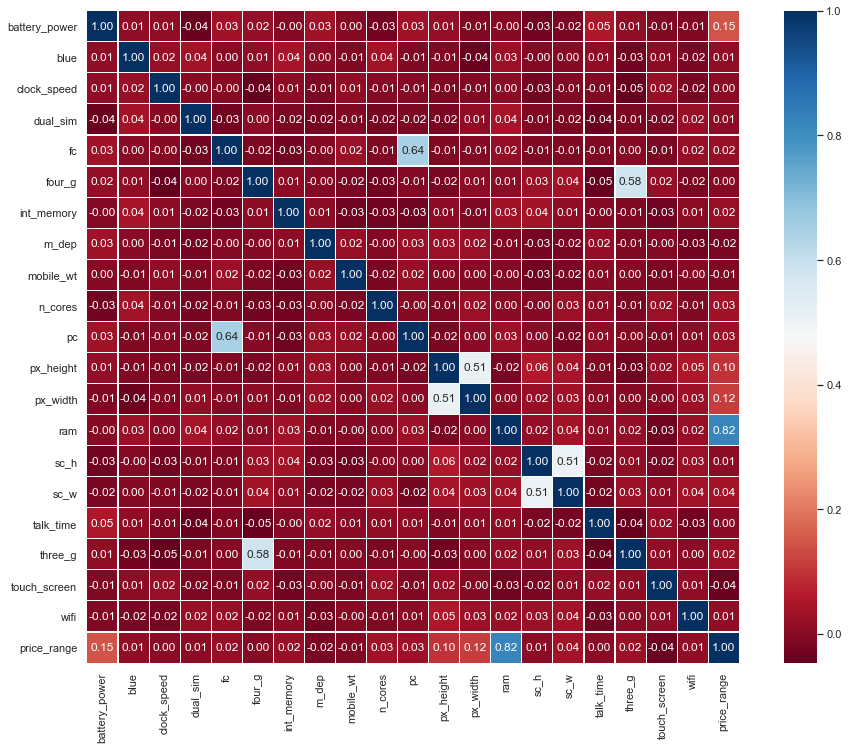

In [5]:
sns.set(font_scale=1)
plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), square=True, annot=True,
            fmt=".2f", linewidths=0.1, cmap="RdBu")

In [6]:
df.corr()['price_range'].apply(lambda x: abs(x)).sort_values(ascending=False)[1:6]

ram              0.822354
battery_power    0.149402
px_width         0.116703
px_height        0.097951
touch_screen     0.040001
Name: price_range, dtype: float64

## ШАГ 2

Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте `0.2`. Параметр `random_state=31`. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

In [7]:
# функция, чтобы разбить данные на трейн и тест
from sklearn.model_selection import train_test_split
# наша модель для классификации
from sklearn.linear_model import LogisticRegression
# метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

Зададим зависимую и независимые переменные:

In [8]:
# Наша целевая переменная
Y = df['price_range']
# X - признаки, по которым мы будем предсказывать
X = df[['ram', 'battery_power', 'px_width', 'px_height', 'touch_screen']]

Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=31)

model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории. 

In [11]:
# precision
print(np.round(precision_score(Y_val, Y_predicted), 4))

0.9859


### Задание

Посчитайте **logloss** для данных в таблице (без нормализации). Укажите число с точностью до сотых:

![logloss1](./img/logloss1.png)

In [12]:
np.round(log_loss([0, 0, 1, 1], [0.2, 0.8, 1, 0.6], normalize=False), 2)

2.34

### Задание

Посчитайте **logloss** для данных в таблице. Необходимо найти среднюю ошибку. Классификация на три класса:

![logloss2](./img/logloss2.png)

In [13]:
log_loss([[0, 0, 1], [0, 0, 1], [1, 0, 0]], [
         [0.2, 0.3, 0.5], [0, 0, 1], [0.1, 0, 0.9]])

0.998577424517998